In [13]:
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

# Load data
dataset = pd.read_csv('/kaggle/input/air-pollution-data/pollution.csv', parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:]  # Drop the first 24 hours

# Encode categorical data
encoder = LabelEncoder()
dataset['wnd_dir'] = encoder.fit_transform(dataset['wnd_dir'])

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset.drop('pollution', axis=1))


/tmp/ipykernel_43/2320058284.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv('/kaggle/input/air-pollution-data/pollution.csv', parse_dates=[['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)


In [3]:
# Define features and target
features = scaled_features
target = dataset['pollution'].values

# Split data into training and remaining dataset
X_train, X_remaining, y_train, y_remaining = train_test_split(features, target, test_size=0.3, random_state=42)

# Split the remaining data into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)


In [7]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

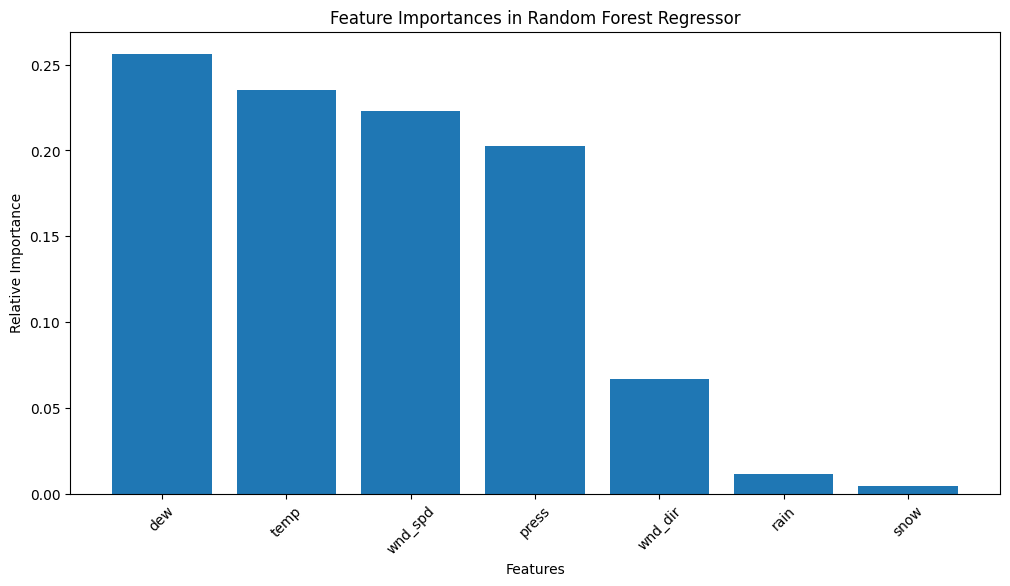

In [14]:
importances = rf.feature_importances_

# Get the feature names (excluding the target variable 'pollution')
feature_names = dataset.drop('pollution', axis=1).columns

# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importances in Random Forest Regressor")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), sorted_feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.show()

In [8]:
# Combine feature names and their importance scores
feature_importances = zip(feature_names, importances)

# Sort the features by their importance
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# Print the feature importances
print("Feature importances:")
for feature, importance in sorted_feature_importances:
    print(f"{feature}: {importance}")

Feature importances:
dew: 0.2563127758992565
temp: 0.23495218737808304
wnd_spd: 0.22313906447334989
press: 0.20260538086614727
wnd_dir: 0.06680083152651556
rain: 0.011567158203835996
snow: 0.004622601652811782


In [4]:
# Validate the model
rf_val_predictions = rf.predict(X_val)
rf_val_rmse = mean_squared_error(y_val, rf_val_predictions, squared=False)
print("Validation RMSE for Random Forest: ", rf_val_rmse)


Validation RMSE for Random Forest:  73.14355054783394


In [5]:
# Initialize and train the Support Vector Regressor
svm = SVR()
svm.fit(X_train, y_train)

# Validate the model
svm_val_predictions = svm.predict(X_val)
svm_val_rmse = mean_squared_error(y_val, svm_val_predictions, squared=False)
print("Validation RMSE for SVM: ", svm_val_rmse)


Validation RMSE for SVM:  82.43127051948618


In [6]:
# Evaluate Random Forest model
rf_test_predictions = rf.predict(X_test)
rf_test_rmse = mean_squared_error(y_test, rf_test_predictions, squared=False)
print("Test RMSE for Random Forest: ", rf_test_rmse)

# Evaluate SVM model
svm_test_predictions = svm.predict(X_test)
svm_test_rmse = mean_squared_error(y_test, svm_test_predictions, squared=False)
print("Test RMSE for SVM: ", svm_test_rmse)


Test RMSE for Random Forest:  74.71833487005605
Test RMSE for SVM:  83.06858875593728
